In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('numpy:\t\t', np.__version__)
print('matplotlib:\t', matplotlib.__version__)
print('tensorflow:\t', tf.__version__)

numpy:		 1.18.1
matplotlib:	 3.1.3
tensorflow:	 2.0.0


In [11]:
# Loading preprocesed dataset.
fashion_mnist = keras.datasets.fashion_mnist

In [81]:
# Create training/testing sets.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [82]:
# Declare class names, so we can use this later when ploting the results. 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [83]:
# Explore the datasets.
train_images.shape

(60000, 28, 28)

In [84]:
# Preprocess data by converting color values thatrange
# from 0 to 255 into a range of 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [85]:
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()

In [86]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()

In [87]:
# Building the (classification)model.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [88]:
# Compiling the model and configure the optimizer/loss functions 
# and set the primary evaluation metric(s).
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [89]:
# Train the model with the training dataset.
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4978 - accuracy: 0.8257
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3728 - accuracy: 0.8663
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3350 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - ETA: 0s - loss: 0.3135 - accuracy: 0.8850 ETA: 0s - loss: 0.3131 - accuracy:  - ETA: 0s - loss: 0.3142 - ac - 3s 46us/sample - loss: 0.3130 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2938 - accuracy: 0.8923
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2813 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2695 - accuracy: 0.8990
Epoch 8/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2558 - accuracy: 0.9053
Epoch 9/10


In [94]:
# Display the summary of the model's performance.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest loss:\t', test_loss)
print('Test accuracy:\t', test_acc)

10000/1 - 0s - loss: 0.2174 - accuracy: 0.8864

Test loss:	 0.33779161043167116
Test accuracy:	 0.8864


In [95]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [102]:
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])
# test_labels[0]

9

In [103]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


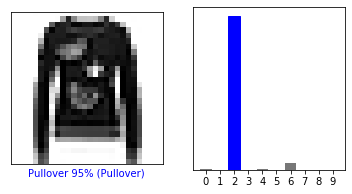

In [110]:
i = 5000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

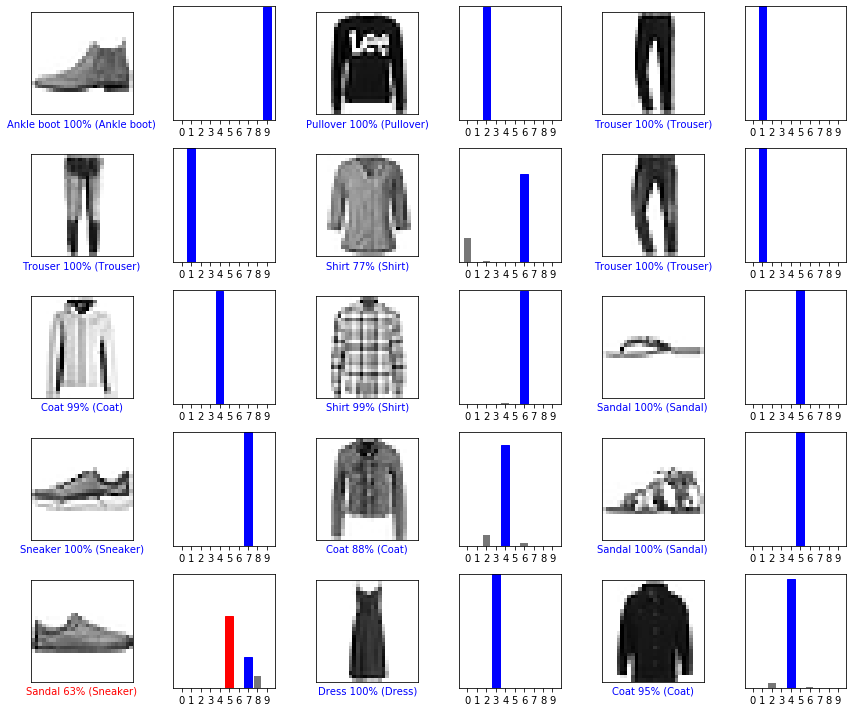

In [111]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

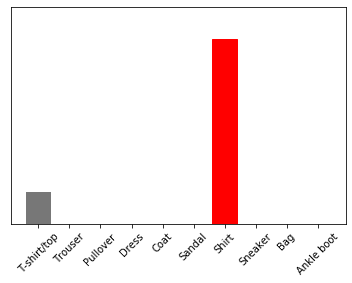

In [121]:
img = test_images[1000]
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
